In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('housing_cleaned.csv')

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
19659,-121.09,39.48,25.0,1665.0,374,845.0,330.0,1.5603,78100.0,INLAND
19660,-121.21,39.49,18.0,697.0,150,356.0,114.0,2.5568,77100.0,INLAND
19661,-121.22,39.43,17.0,2254.0,485,1007.0,433.0,1.7000,92300.0,INLAND
19662,-121.32,39.43,18.0,1860.0,409,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# Let's get some insights inot the dataset before building the model

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19664 entries, 0 to 19663
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19664 non-null  float64
 1   latitude            19664 non-null  float64
 2   housing_median_age  19664 non-null  float64
 3   total_rooms         19664 non-null  float64
 4   total_bedrooms      19664 non-null  int64  
 5   population          19664 non-null  float64
 6   households          19664 non-null  float64
 7   median_income       19664 non-null  float64
 8   median_house_value  19664 non-null  float64
 9   ocean_proximity     19664 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 1.5+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000,19664.000000
mean,-119.563670,35.652543,28.388985,2610.923718,537.899054,1434.978692,499.843979,3.676551,192419.349878
std,2.006292,2.149828,12.503877,2116.819480,413.081745,1081.550247,374.737776,1.570085,97668.920091
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1438.000000,297.000000,796.000000,282.000000,2.526775,116500.000000
50%,-118.505000,34.270000,28.000000,2111.000000,436.000000,1178.500000,411.000000,3.450550,173800.000000
75%,-117.990000,37.730000,37.000000,3119.000000,648.000000,1746.000000,606.000000,4.581725,248100.000000
max,-114.310000,41.950000,52.000000,30450.000000,5033.000000,13251.000000,4855.000000,15.000100,500000.000000


In [8]:
df['ocean_proximity'].value_counts()

<1H OCEAN     8599
INLAND        6523
NEAR OCEAN    2446
NEAR BAY      2096
Name: ocean_proximity, dtype: int64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

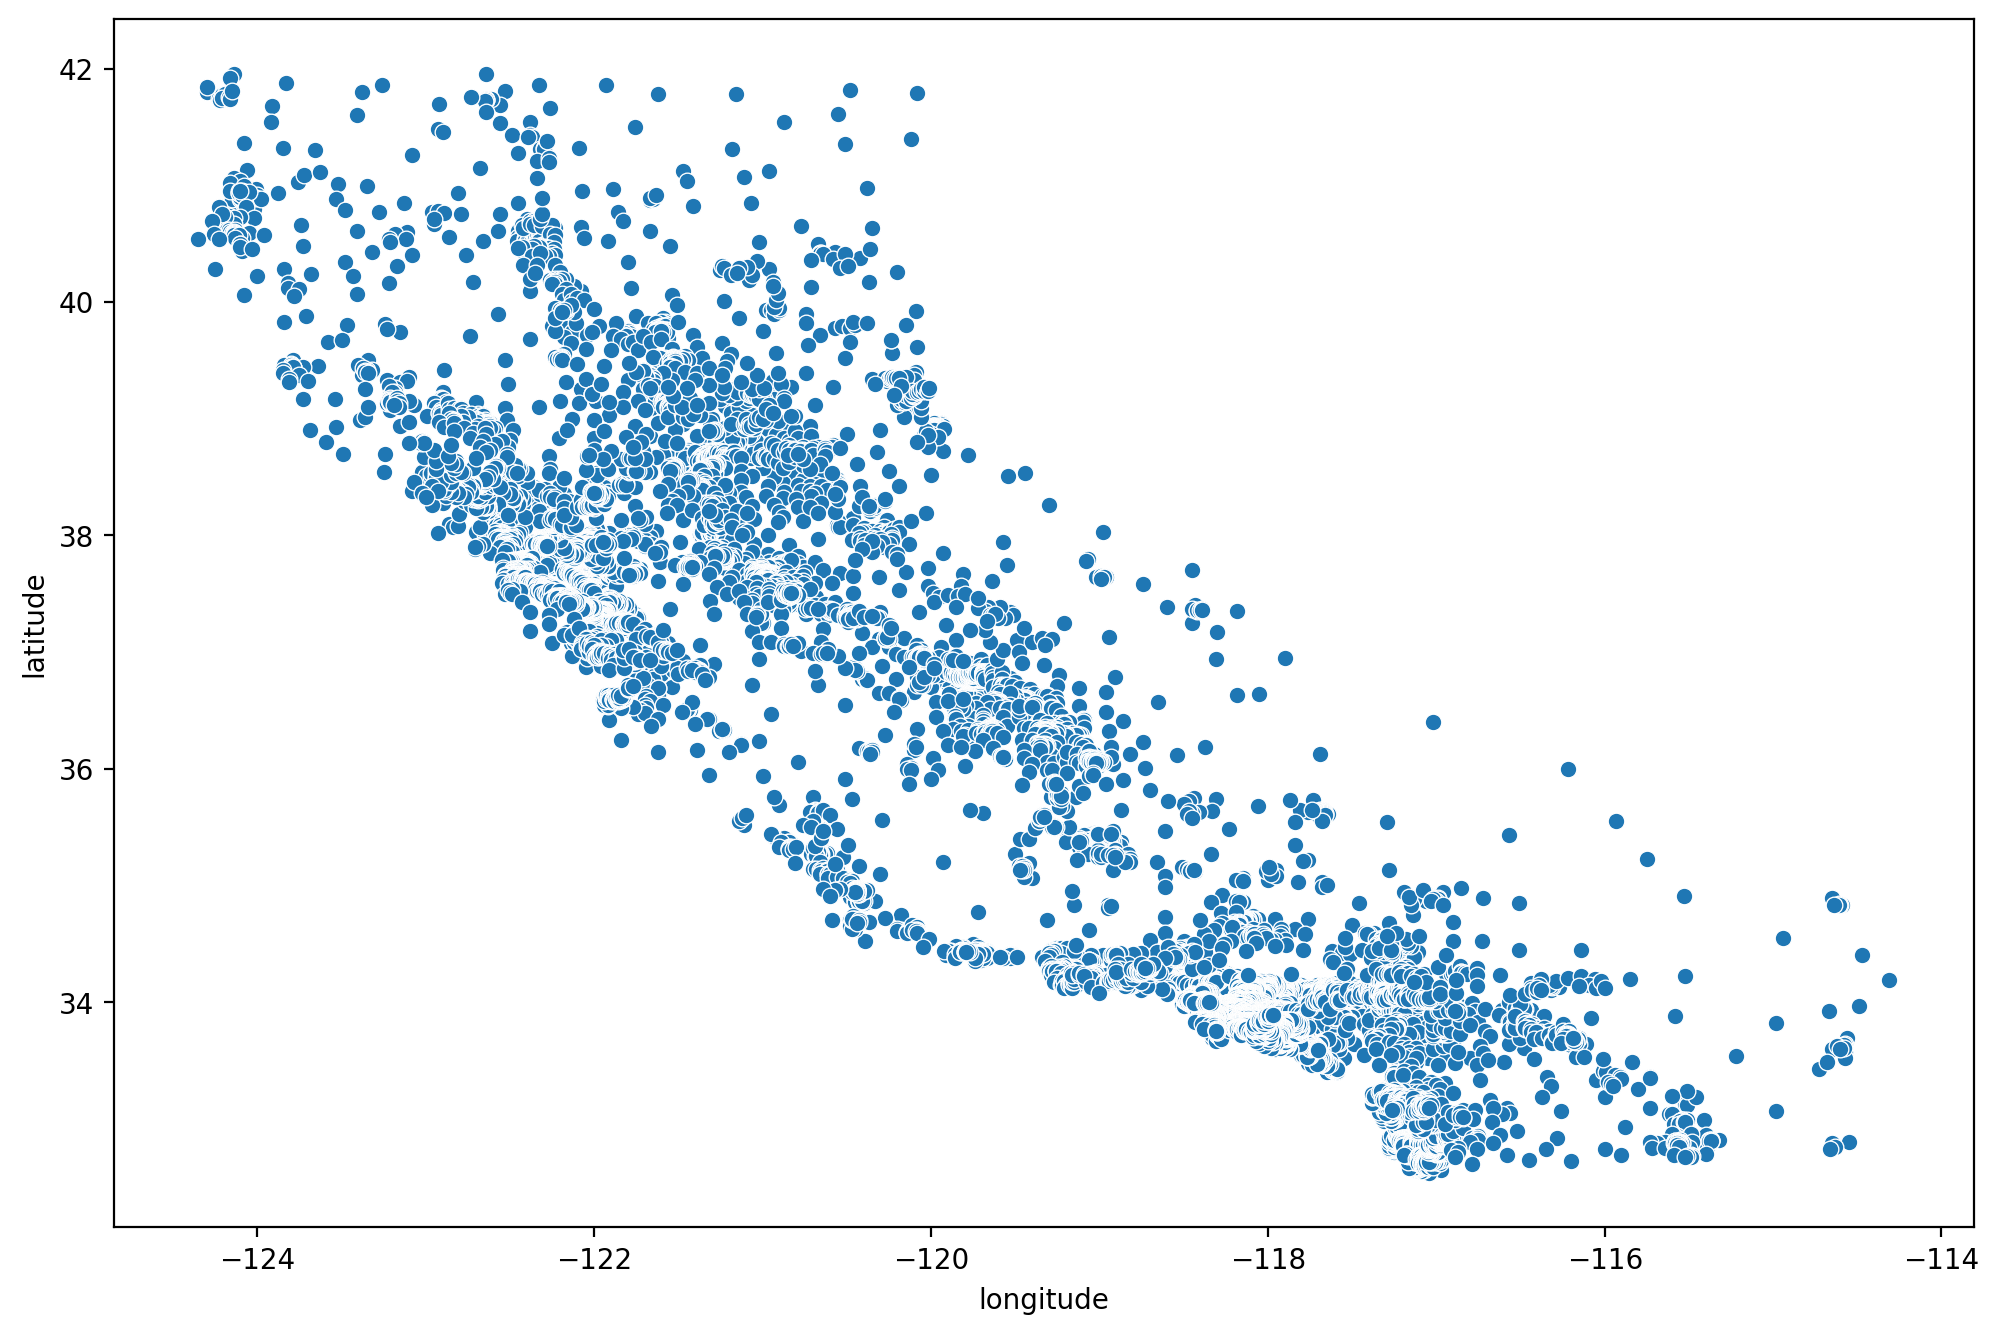

In [9]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x= 'longitude', y= 'latitude')

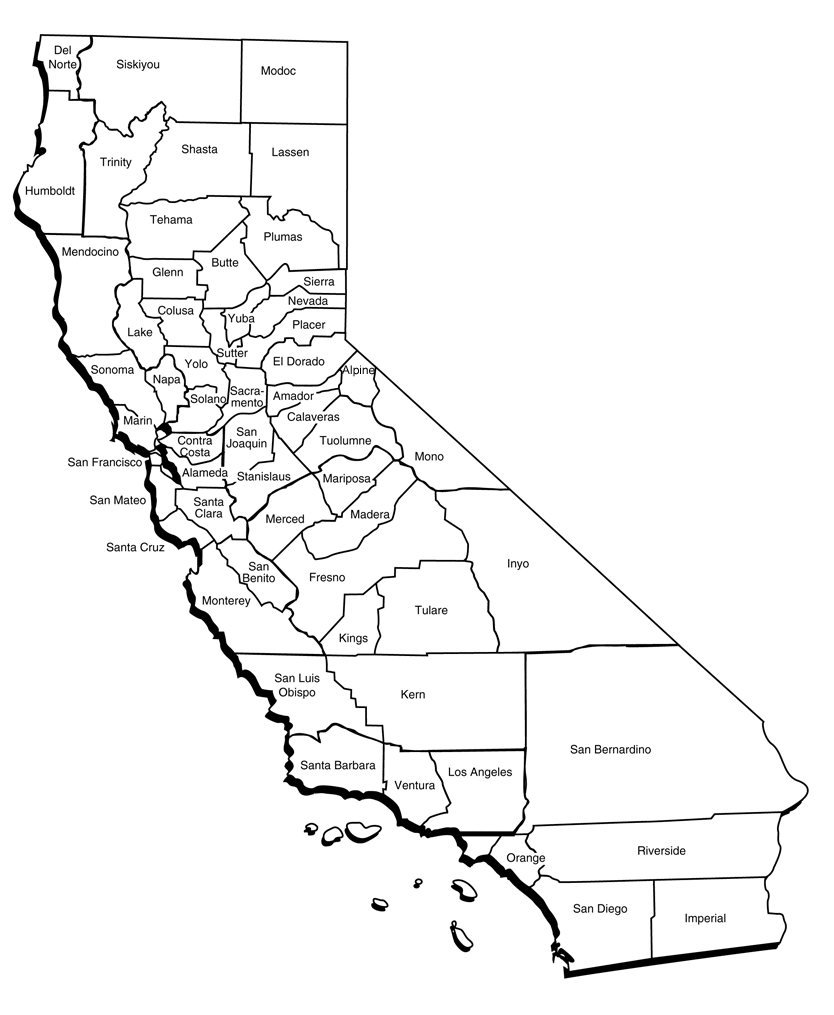

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

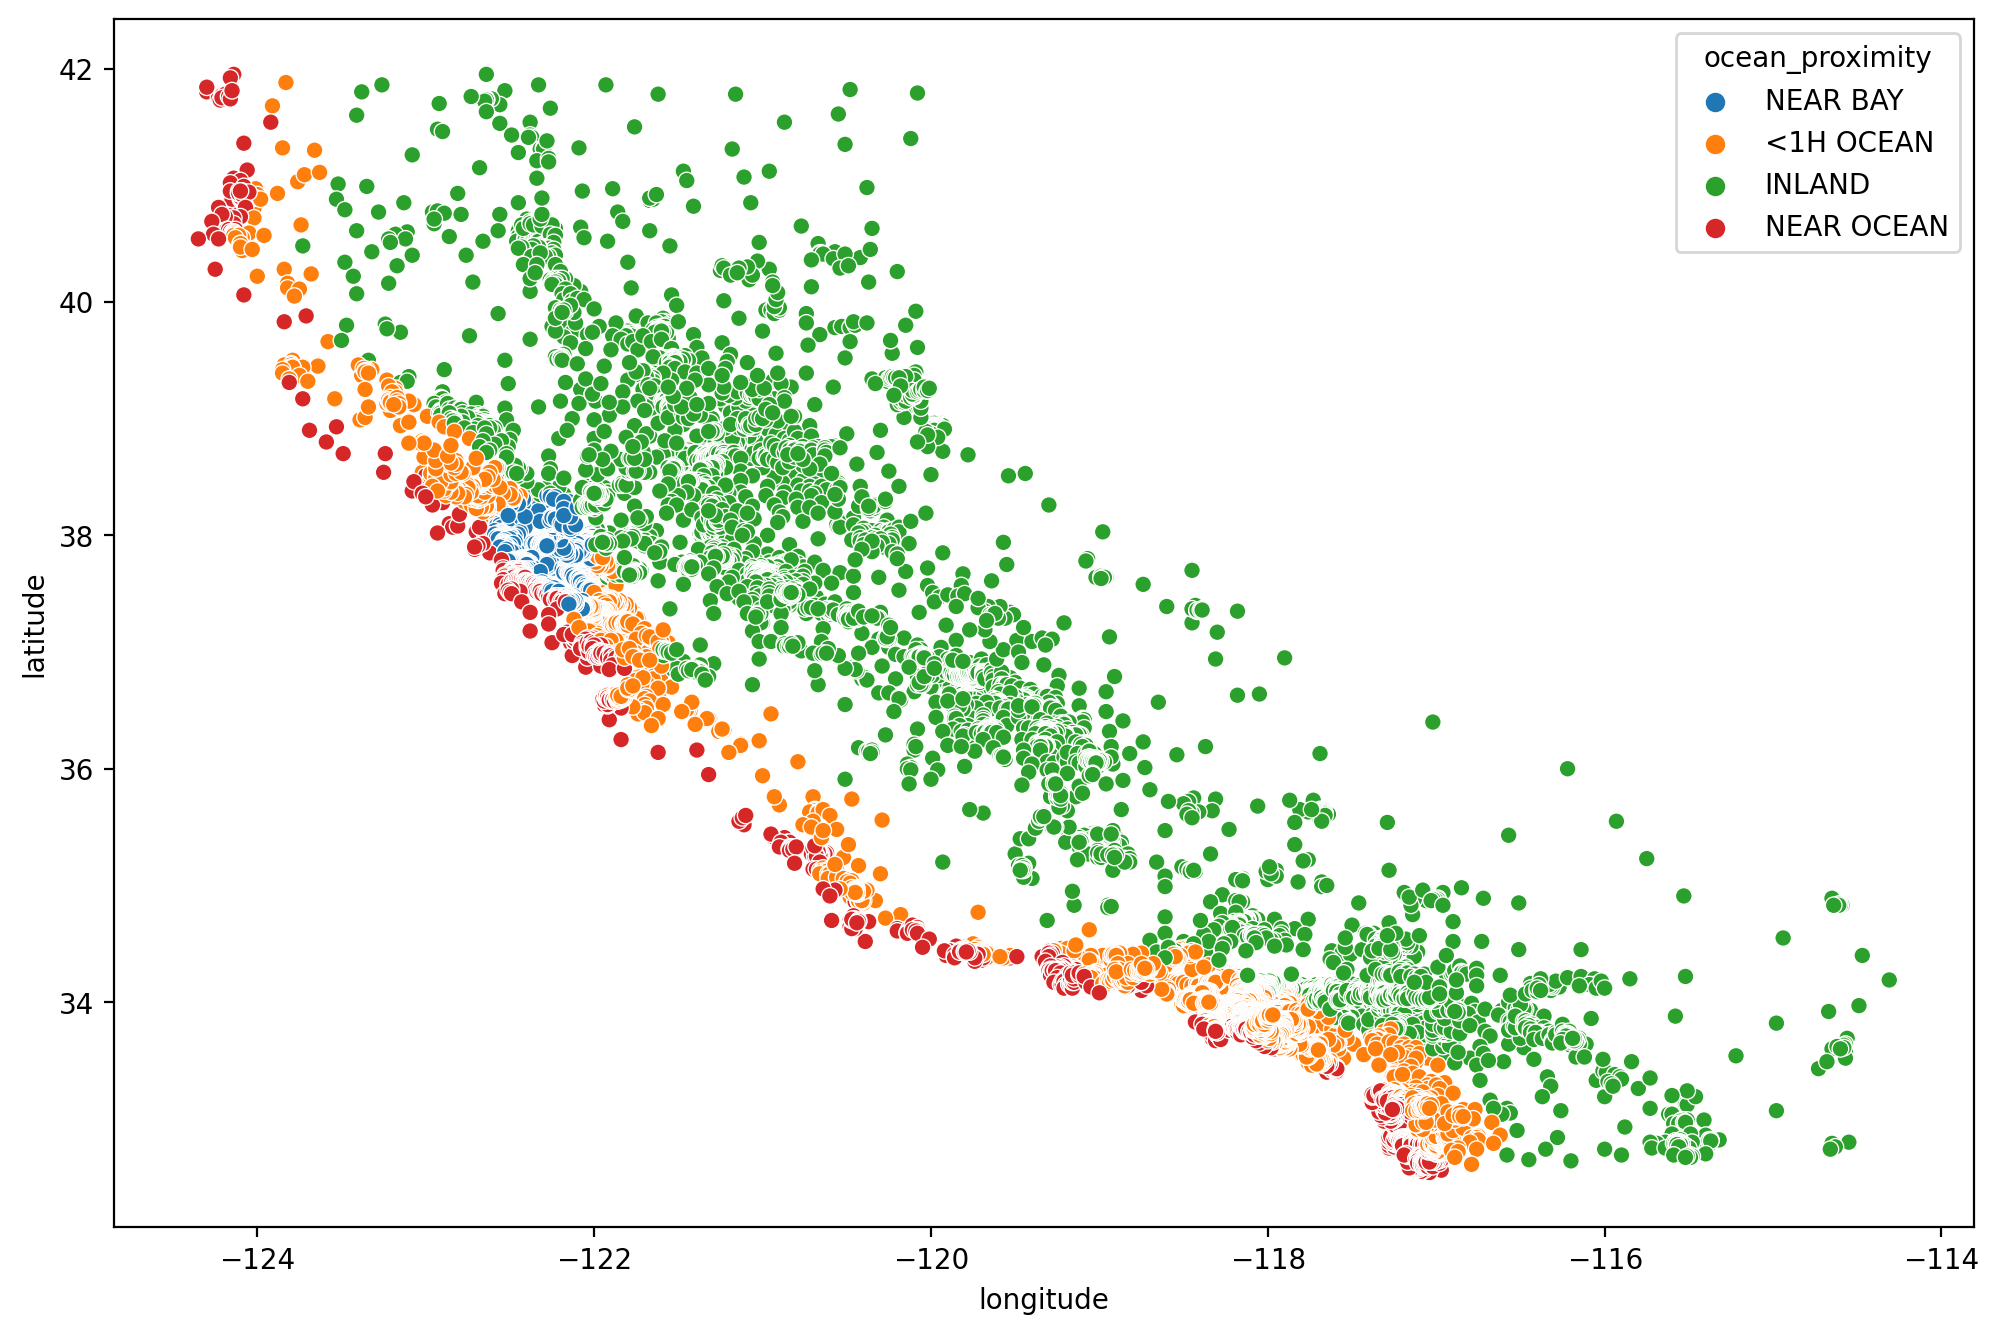

In [13]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x= 'longitude', y= 'latitude', hue='ocean_proximity')

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

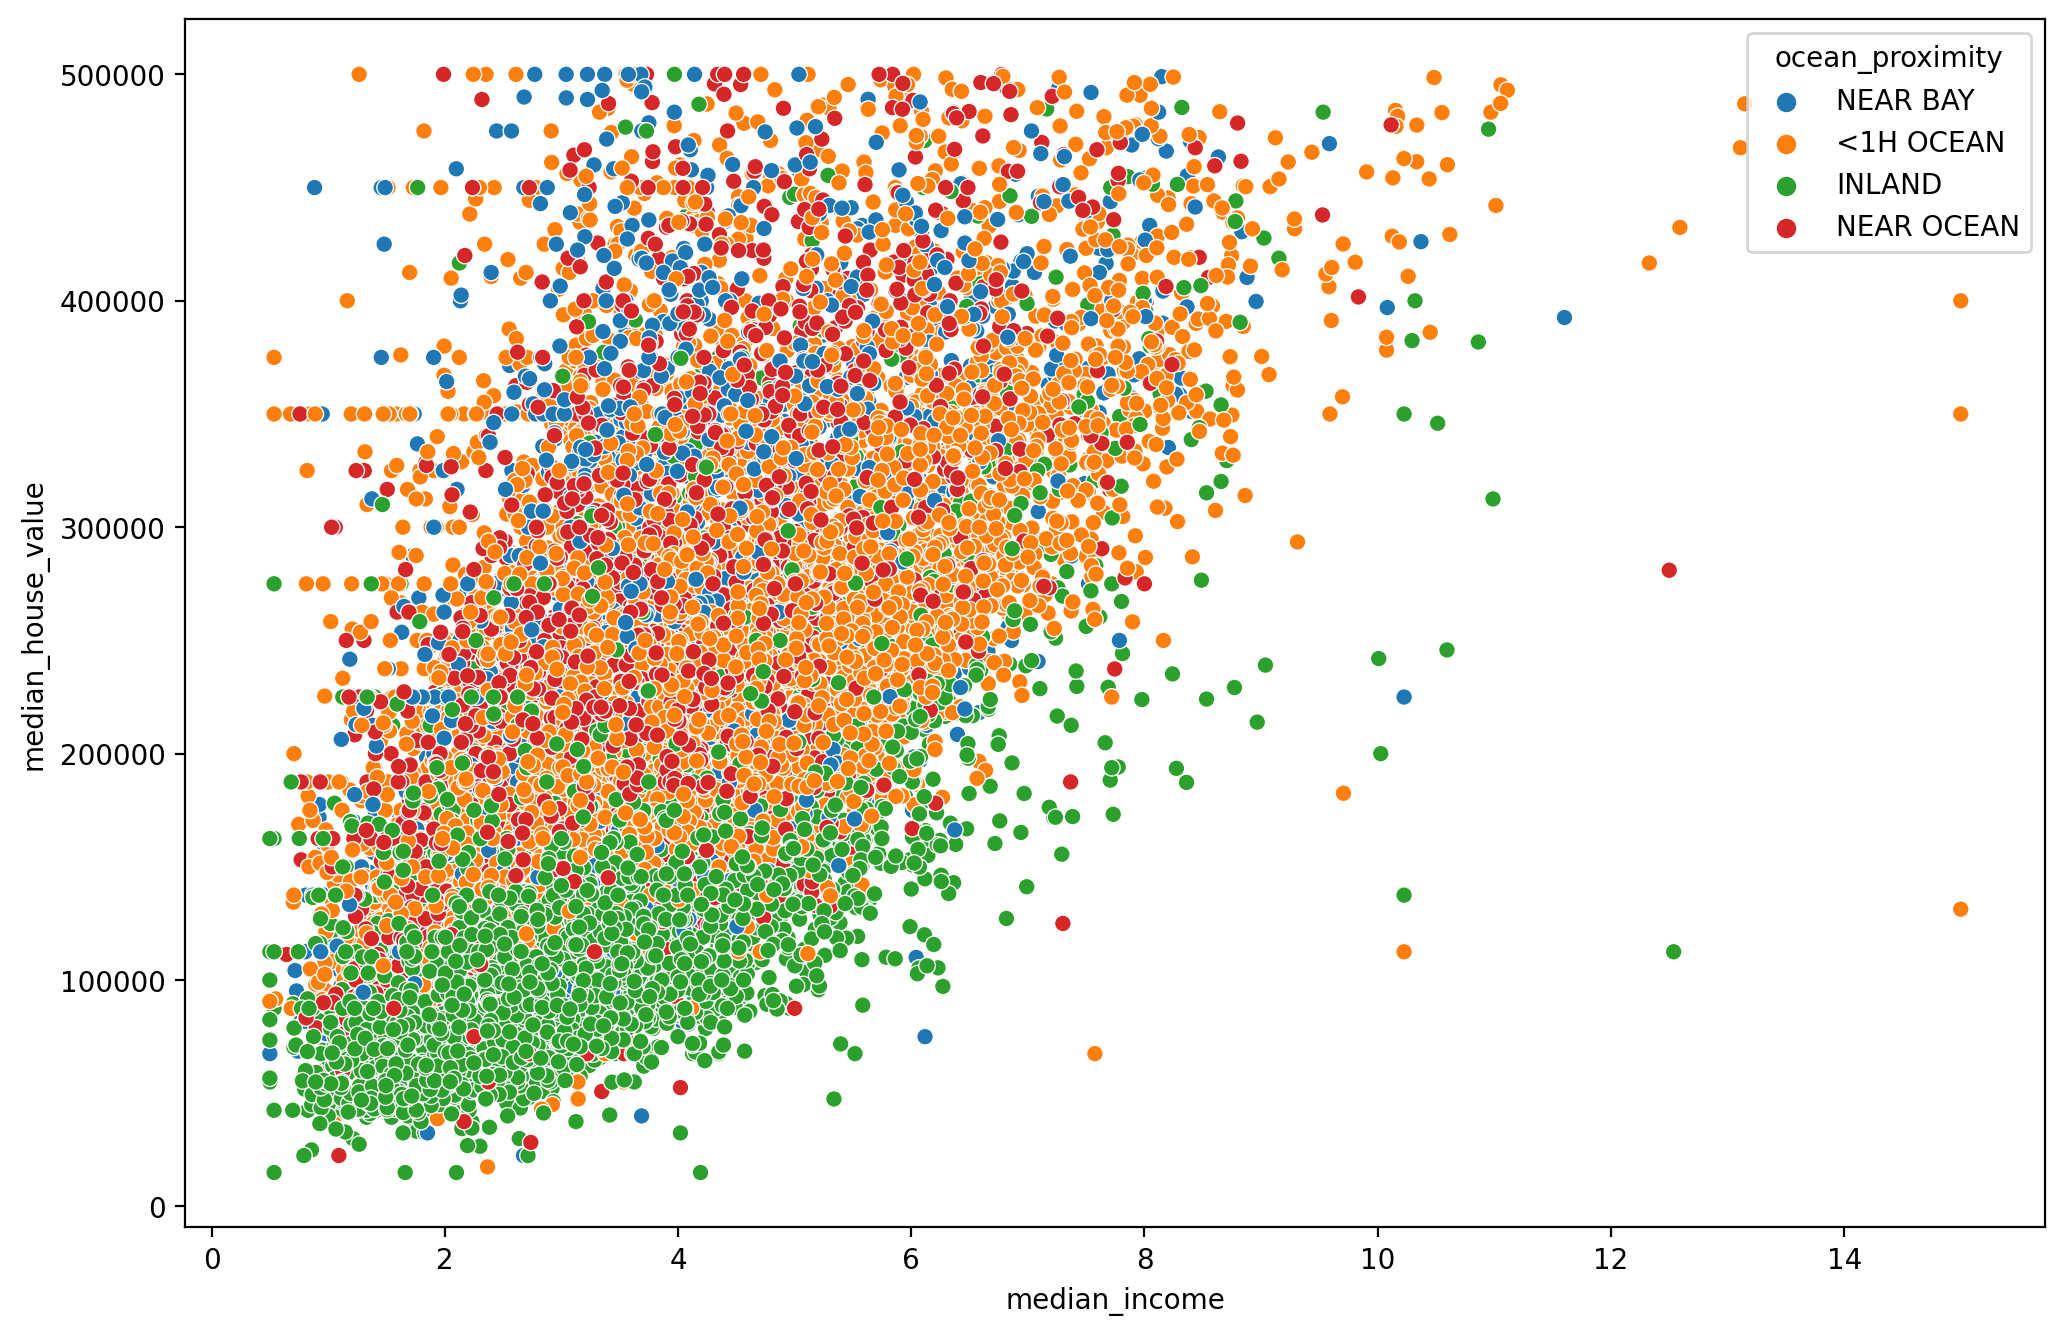

In [14]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=df, x= 'median_income', y= 'median_house_value', hue='ocean_proximity')

In [15]:
X = df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households','median_income' ]]

In [16]:
y =df['median_house_value']

In [17]:
train_rmse =[]
test_rmse = []

In [18]:
for d in range(1,10):
    
    model = PolynomialFeatures(degree =d)
    Extended_X = model.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(Extended_X, y, test_size=0.3, random_state=101)
    
    my_model = LinearRegression()
    my_model.fit(X_train, y_train)
    
    train_pred = my_model.predict(X_train)
    test_pred = my_model.predict(X_test)
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, test_pred)))

In [19]:
train_rmse

[67087.08837001401,
 62819.00597608048,
 59961.3554161465,
 59816.18539094825,
 60495.68776402787,
 103054.6337223228,
 90835.70530513706,
 122096.97067419547,
 134876.52055116917]

In [20]:
test_rmse

[69027.44588851438,
 64221.883261048744,
 62626.151452769074,
 76392.94132954345,
 297577.6529895942,
 8294183.939730089,
 11314571.459812136,
 32134623.00397026,
 80759395.87349786]

In [21]:
df['median_house_value'].mean()

192419.34987794954

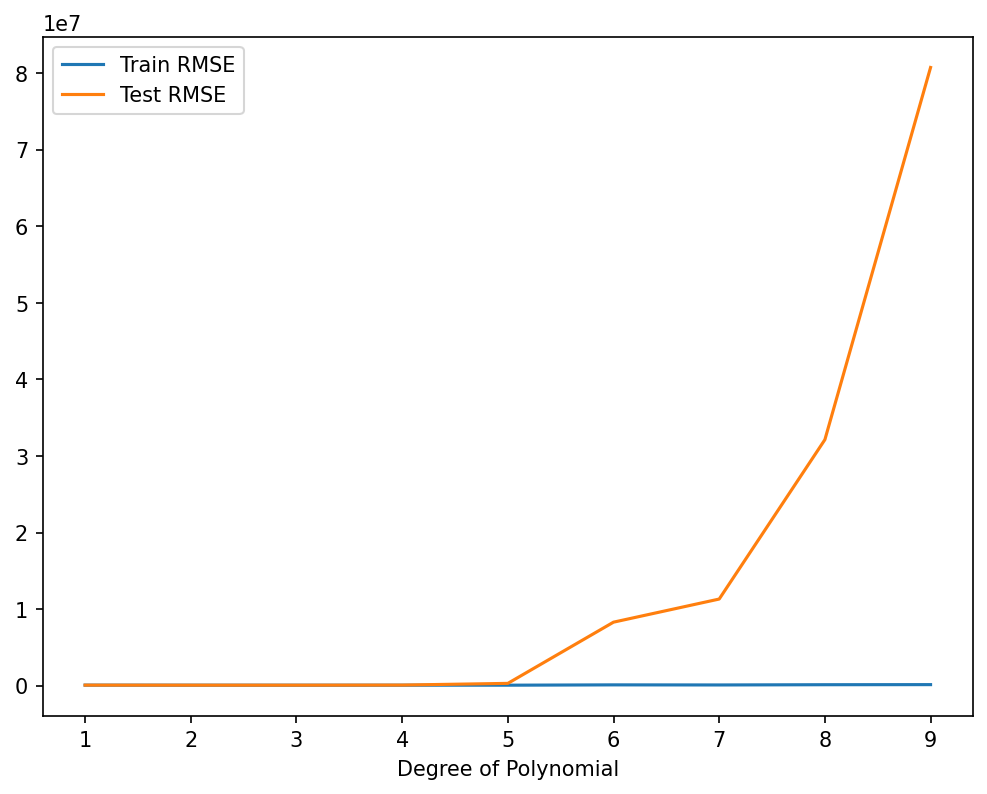

In [22]:
plt.figure(figsize=(8,6), dpi=150)
plt.plot(range(1,10), train_rmse[:9], label = 'Train RMSE')
plt.plot(range(1,10), test_rmse[:9], label = 'Test RMSE')
plt.xlabel('Degree of Polynomial')
plt.legend()

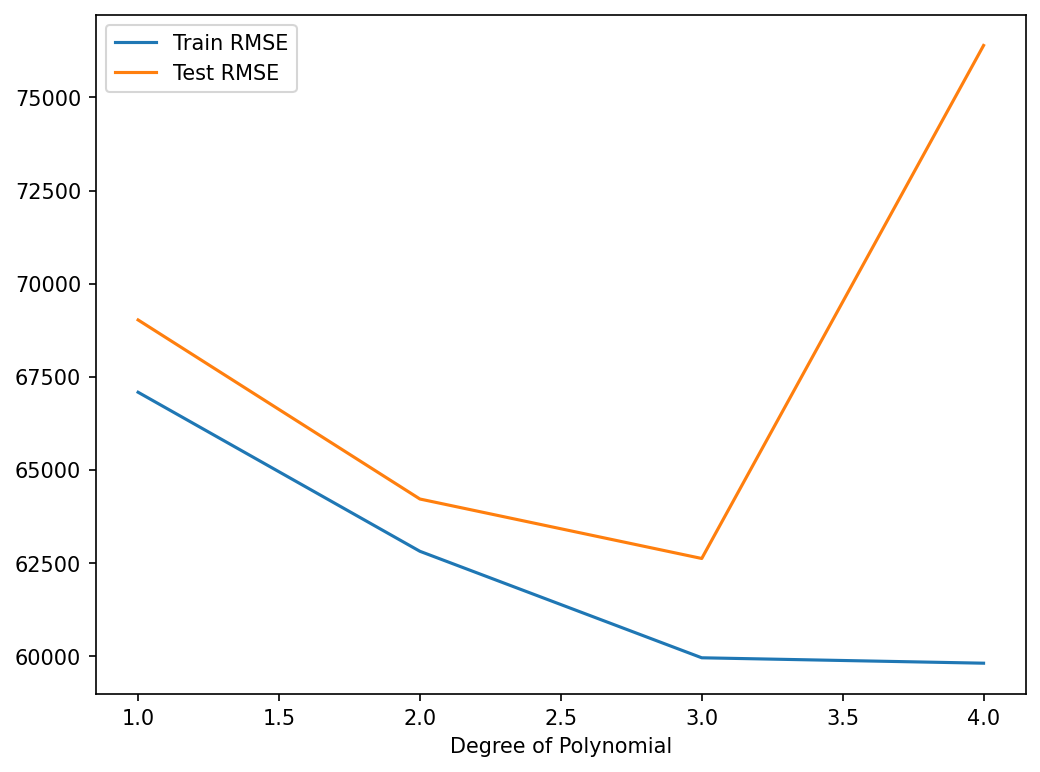

In [23]:
plt.figure(figsize=(8,6), dpi=150)
plt.plot(range(1,5), train_rmse[:4], label = 'Train RMSE')
plt.plot(range(1,5), test_rmse[:4], label = 'Test RMSE')
plt.xlabel('Degree of Polynomial')
plt.legend()

We will adopt polynomial degree = 3 as a final model

In [24]:
model = PolynomialFeatures(degree =3)
Extended_X = model.fit_transform(X)
    
X_train, X_test, y_train, y_test = train_test_split(Extended_X, y, test_size=0.3, random_state=101)
    
my_model = LinearRegression()
my_model.fit(X_train, y_train)
    
y_hat = my_model.predict(X_test)
    
MAE = mean_absolute_error(y_test, y_hat)
RMSE = np.sqrt(mean_squared_error(y_test, y_hat))

In [25]:
MAE

46055.4665027853

In [26]:
RMSE

62626.151452769074

In [27]:
df['median_house_value'].mean()

192419.34987794954

In [28]:
68648.58111239635*100/206864.41315519012

33.18530242361988

### the error range is too large (~ 33% of the mean). Stay tuned, next we will add more predicitve features to improve the model